In [1]:
# from last night

In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
from shapely.ops import polygonize, split
from mapclassify import greedy

import geopandas as gpd

import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')
from nbhd.geography import Neighbourhood

Initializing database connection...
Database connected!


In [3]:
n = Neighbourhood()

In [4]:
n.get_data()

Getting data took 0 minutes, 0 seconds.


In [1]:
# https://stackoverflow.com/questions/27548363/from-voronoi-tessellation-to-shapely-polygons

In [5]:
points = np.array([[p.x, p.y] for p in n.uprn.geometry])

In [112]:
# lines.append(n.geom.boundary)

In [6]:
def get_voronoi_cells(points, polygon):
    
    vor = Voronoi(points) 
    lines = [
        shapely.geometry.LineString(vor.vertices[line])
        for line in vor.ridge_vertices
    ]

    polys = shapely.ops.polygonize(lines)

    cells = [x for p in polys 
                 for x in list(split(p, polygon.boundary)) 
                 if polygon.buffer(1).contains(x)
                ]
    return cells

In [7]:
cells = get_voronoi_cells(points,n.geom)

In [8]:
gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(cells))

gdf['t'] = gdf.geometry.apply(lambda x: x.type)

gdf['c'] = greedy(gdf)

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

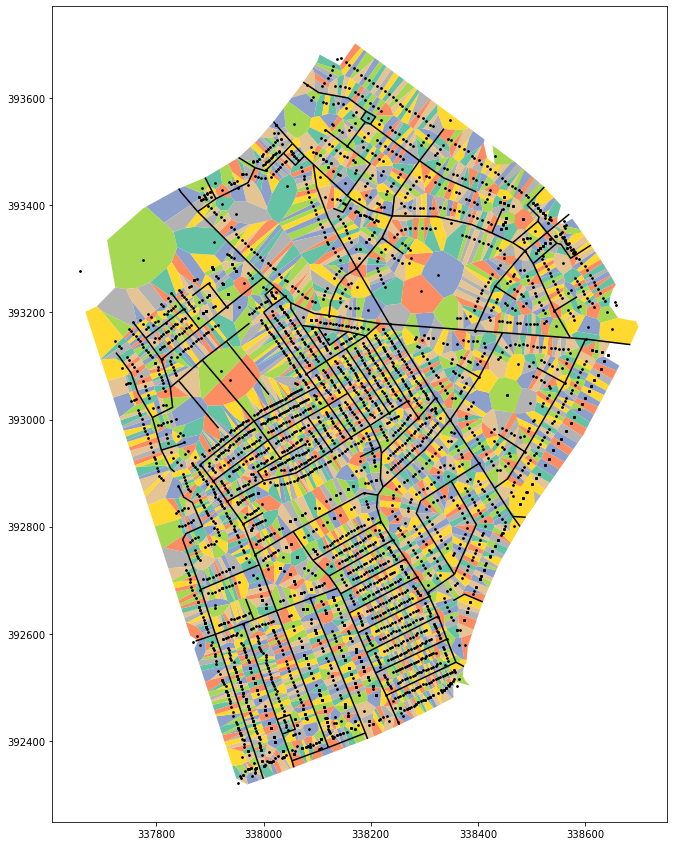

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
gdf.plot('c', cmap='Set2', ax=ax)
n.uprn.plot(ax=ax, color='k', markersize=3)
n.roads.plot('roadFunction', ax=ax, color='k')

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

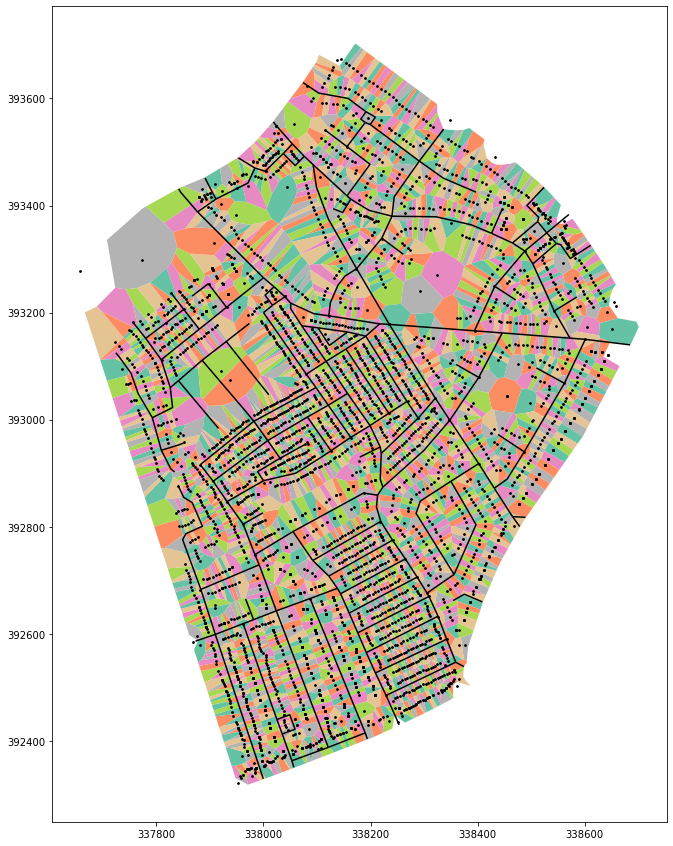

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

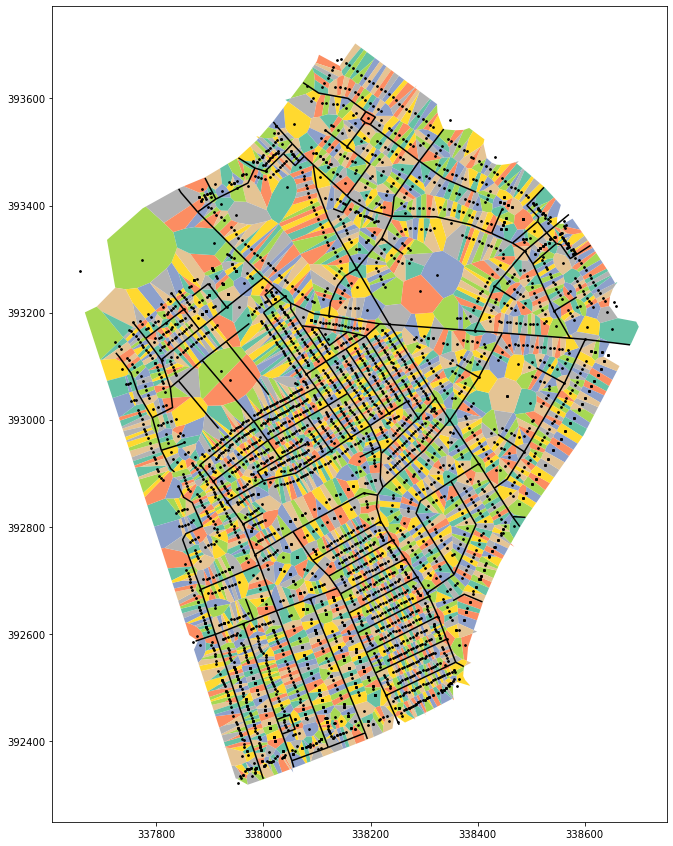

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

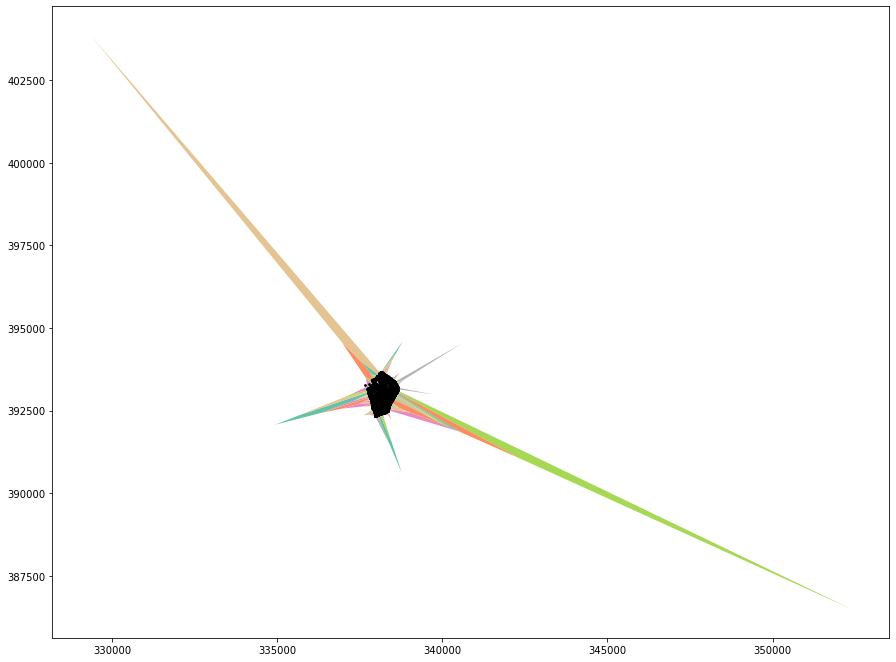

<AxesSubplot:>

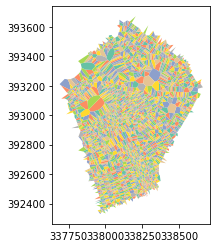

In [74]:
len(gdf)

2964

In [76]:
len(n.uprn)

3702

In [32]:
contained = [encircle(l, n.geom) for l in lines]

In [21]:
from shapely.geometry import MultiPolygon, MultiLineString

In [22]:
from shapely.ops import split

In [33]:
contained.append(n.geom.boundary)

In [34]:
u = shapely.ops.unary_union(contained)

In [6]:
import geopandas as gpd

In [38]:
from mapclassify import greedy

In [51]:
gdf['t'] = gdf.geometry.apply(lambda x: x.type)

In [52]:
gdfn = gdf.loc[gdf.t!='GeometryCollection']

<AxesSubplot:>

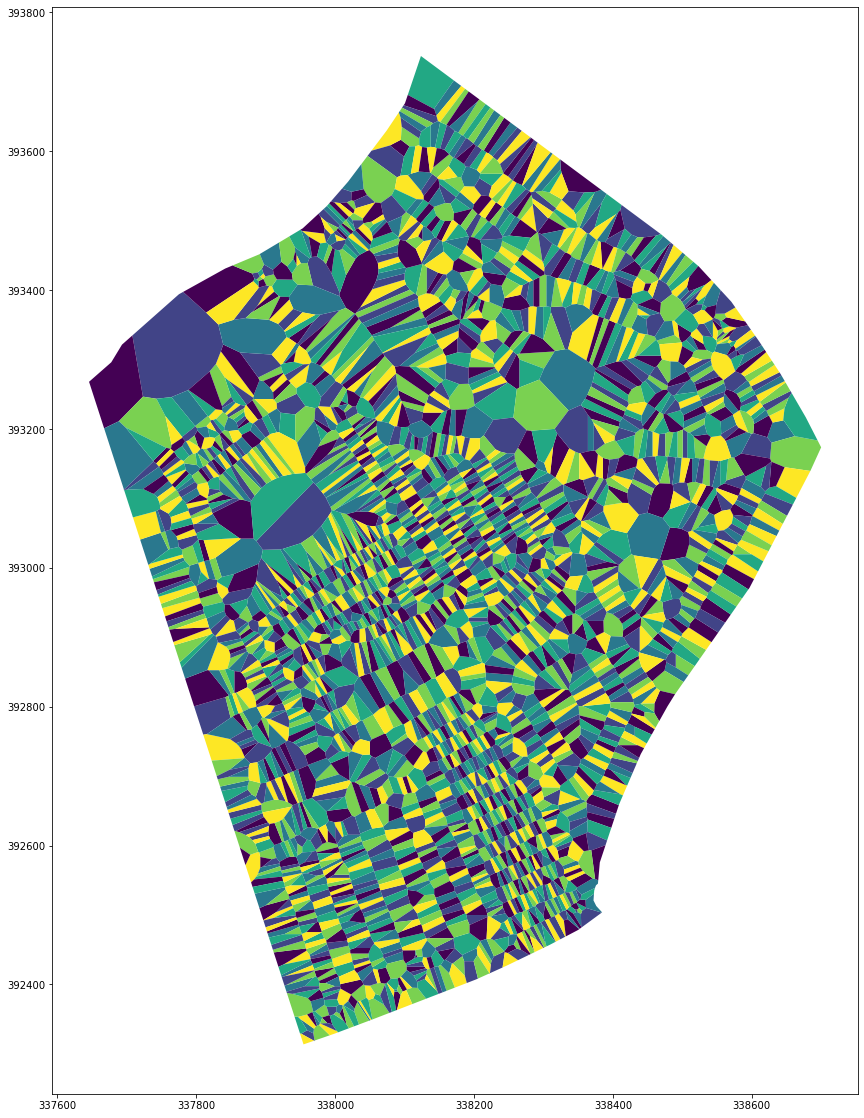

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
gdfn.plot('c', ax=ax)